In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# generate 2 class dataset
x,y = make_classification(n_samples = 1000, n_classes = 2, random_state = 2)

In [5]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.25 , random_state = 42)

In [7]:
x_train.shape  , y_train.shape , x_test.shape , y_test.shape

((750, 20), (750,), (250, 20), (250,))

In [34]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [12]:
# train model 
model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [31]:
# prediction based probability
model_prob = model.predict_proba(x_test)
model_prob

array([[9.41108466e-01, 5.88915344e-02],
       [1.28060051e-01, 8.71939949e-01],
       [2.34227156e-03, 9.97657728e-01],
       [2.00505820e-01, 7.99494180e-01],
       [2.73925455e-01, 7.26074545e-01],
       [3.62957985e-02, 9.63704202e-01],
       [2.17566813e-02, 9.78243319e-01],
       [8.68083171e-02, 9.13191683e-01],
       [8.25836137e-01, 1.74163863e-01],
       [5.80531809e-01, 4.19468191e-01],
       [9.87006623e-01, 1.29933774e-02],
       [8.03761069e-01, 1.96238931e-01],
       [2.39008107e-01, 7.60991893e-01],
       [3.70999404e-01, 6.29000596e-01],
       [1.09883641e-02, 9.89011636e-01],
       [4.77910628e-02, 9.52208937e-01],
       [1.81765376e-02, 9.81823462e-01],
       [8.20629959e-01, 1.79370041e-01],
       [9.49979450e-01, 5.00205502e-02],
       [9.98846355e-01, 1.15364495e-03],
       [1.28041352e-02, 9.87195865e-01],
       [2.51225272e-02, 9.74877473e-01],
       [1.16899955e-02, 9.88310004e-01],
       [6.41230827e-01, 3.58769173e-01],
       [6.860458

In [32]:
model_prob = model_prob[:, 1]

In [33]:
model_prob.shape

(250,)

In [35]:
# calculate the score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [37]:
dummy_auc = roc_auc_score(y_test , dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_auc)
print(model_auc)

0.5
0.960023063617144


In [ ]:
# calculate the roc curve for false positive curve and true positive curve

In [52]:
dummy_fpr, dummy_tpr, _  = roc_curve(y_test , dummy_model_prob)
model_fpr , model_tpr, thresholds = roc_curve(y_test, model_prob)

In [53]:
dummy_fpr , dummy_tpr

(array([0., 1.]), array([0., 1.]))

In [54]:
model_fpr  , model_tpr

(array([0.        , 0.        , 0.        , 0.00775194, 0.00775194,
        0.01550388, 0.01550388, 0.02325581, 0.02325581, 0.03875969,
        0.03875969, 0.04651163, 0.04651163, 0.05426357, 0.05426357,
        0.0620155 , 0.0620155 , 0.10077519, 0.10077519, 0.13178295,
        0.13178295, 0.13953488, 0.13953488, 0.15503876, 0.15503876,
        0.18604651, 0.18604651, 0.24031008, 0.24031008, 0.3255814 ,
        0.3255814 , 0.36434109, 0.36434109, 0.52713178, 0.52713178,
        0.55813953, 0.55813953, 0.64341085, 0.64341085, 0.68217054,
        0.68217054, 1.        ]),
 array([0.        , 0.00826446, 0.6446281 , 0.6446281 , 0.74380165,
        0.74380165, 0.79338843, 0.79338843, 0.80991736, 0.80991736,
        0.81818182, 0.81818182, 0.85950413, 0.85950413, 0.89256198,
        0.89256198, 0.90082645, 0.90082645, 0.90909091, 0.90909091,
        0.91735537, 0.91735537, 0.92561983, 0.92561983, 0.9338843 ,
        0.9338843 , 0.94214876, 0.94214876, 0.95041322, 0.95041322,
        0.9586

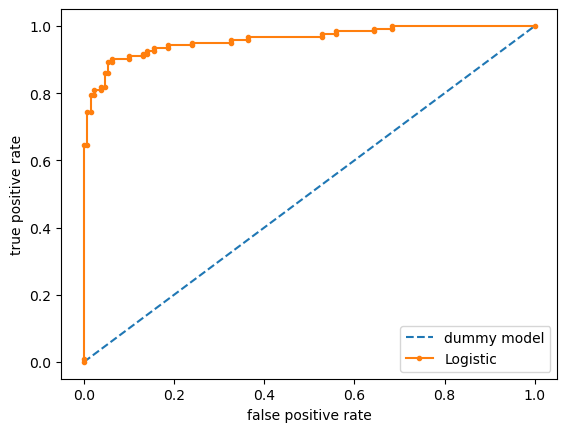

In [59]:
plt.plot(dummy_fpr, dummy_tpr , linestyle = '--', label = 'dummy model')
plt.plot(model_fpr , model_tpr , marker = '.', label = 'Logistic')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

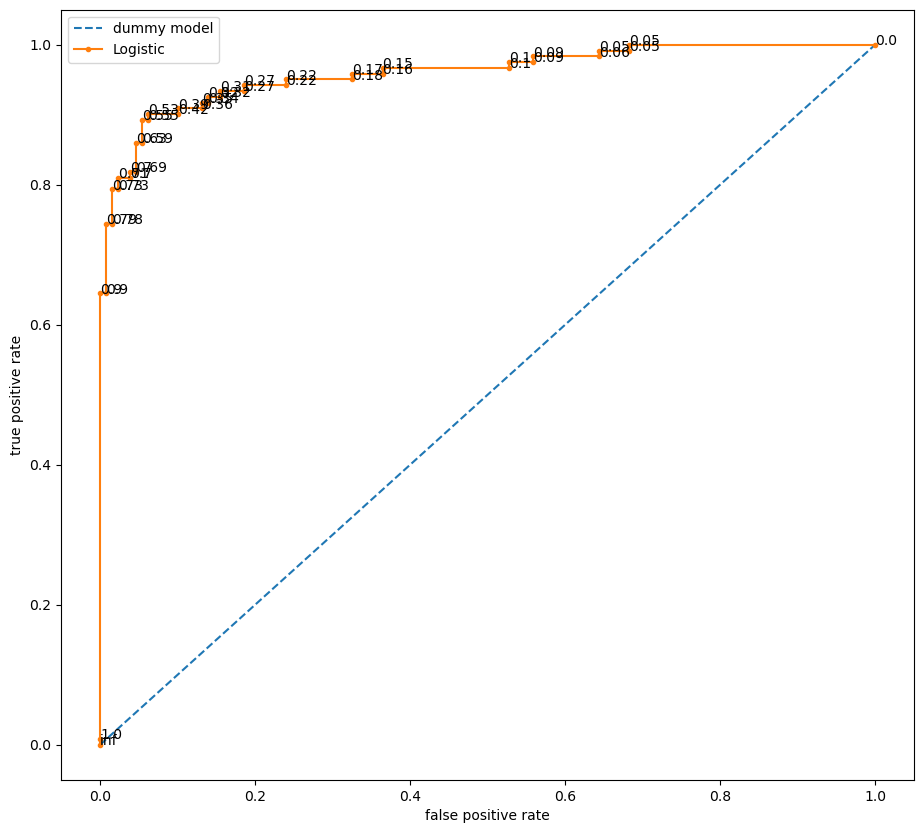

In [66]:
# plot the roc curve for model
fig = plt.figure(figsize = (11,10))
ax = fig.add_subplot(111)
plt.plot(dummy_fpr, dummy_tpr , linestyle = '--', label = 'dummy model')
plt.plot(model_fpr , model_tpr , marker = '.', label = 'Logistic')
for xyz in zip(model_fpr , model_tpr , thresholds):
    ax.annotate('%s' %np.round(xyz[2],2), xy = (xyz[0], xyz[1]))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()